In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../../DATA/rock_density_xray.csv")

In [4]:
df

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


In [6]:
df.columns = ['Signal', 'Density']

<Axes: xlabel='Signal', ylabel='Density'>

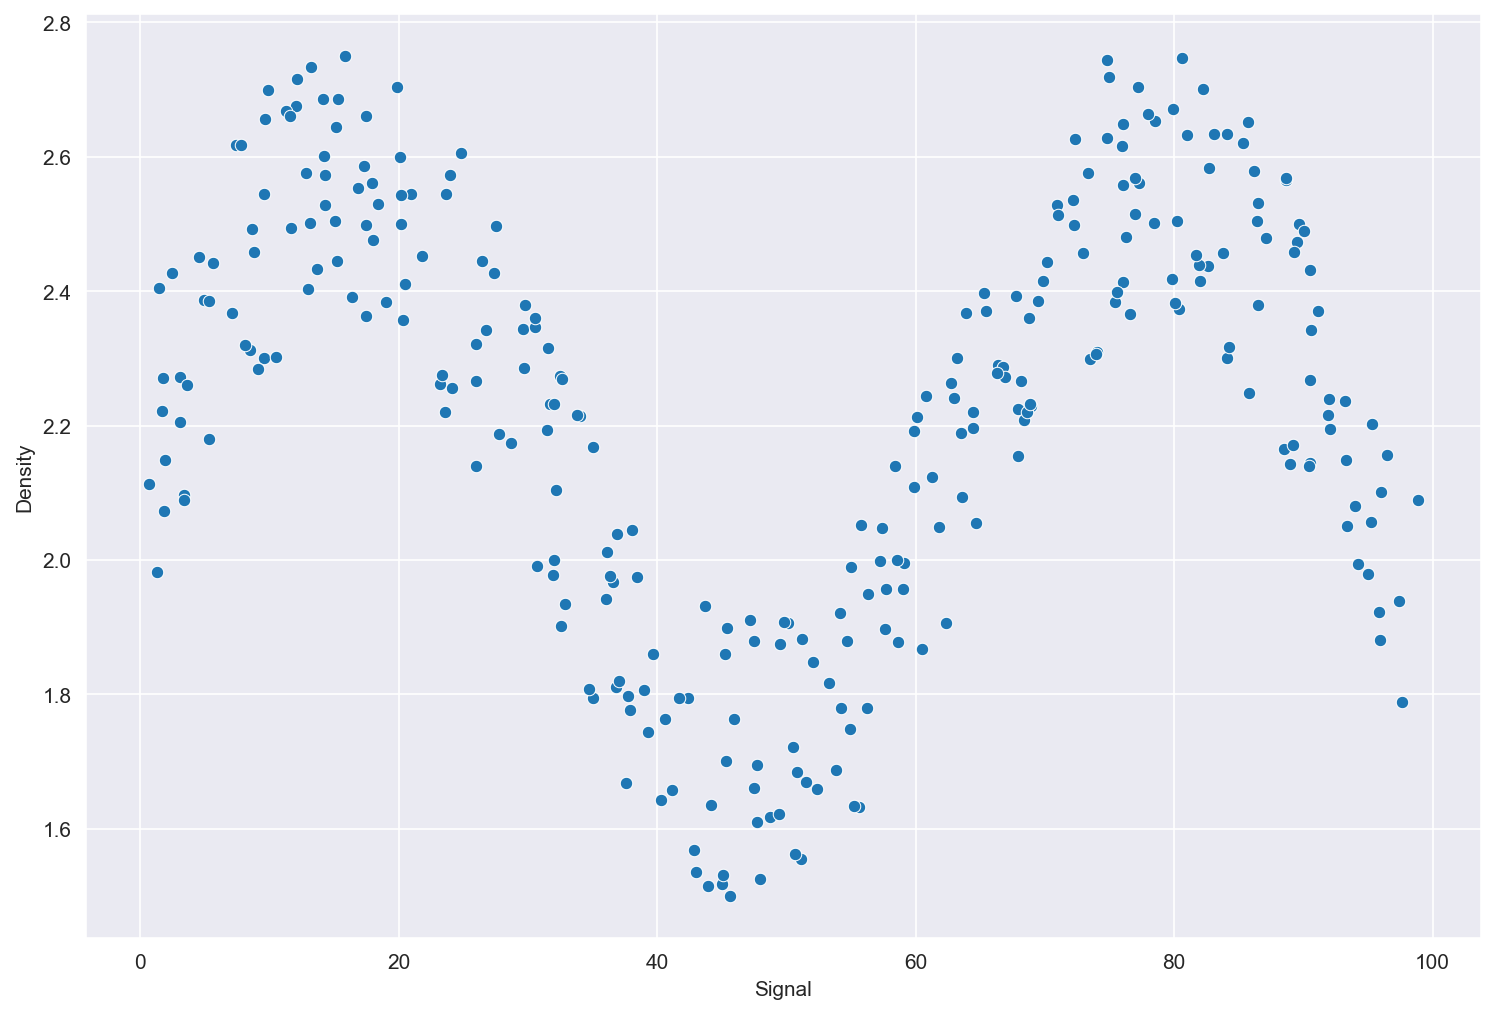

In [8]:
plt.figure(figsize=(12, 8), dpi=150)
sns.scatterplot(x='Signal', y='Density', data=df)

In [11]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr_model = LinearRegression()

In [16]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [17]:
lr_preds = lr_model.predict(X_test)

In [18]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
mean_squared_error(y_test, lr_preds)

0.0660516726514864

In [21]:
single_range = np.arange(0, 100)

In [22]:
lr_output = lr_model.predict(single_range.reshape(-1,1))

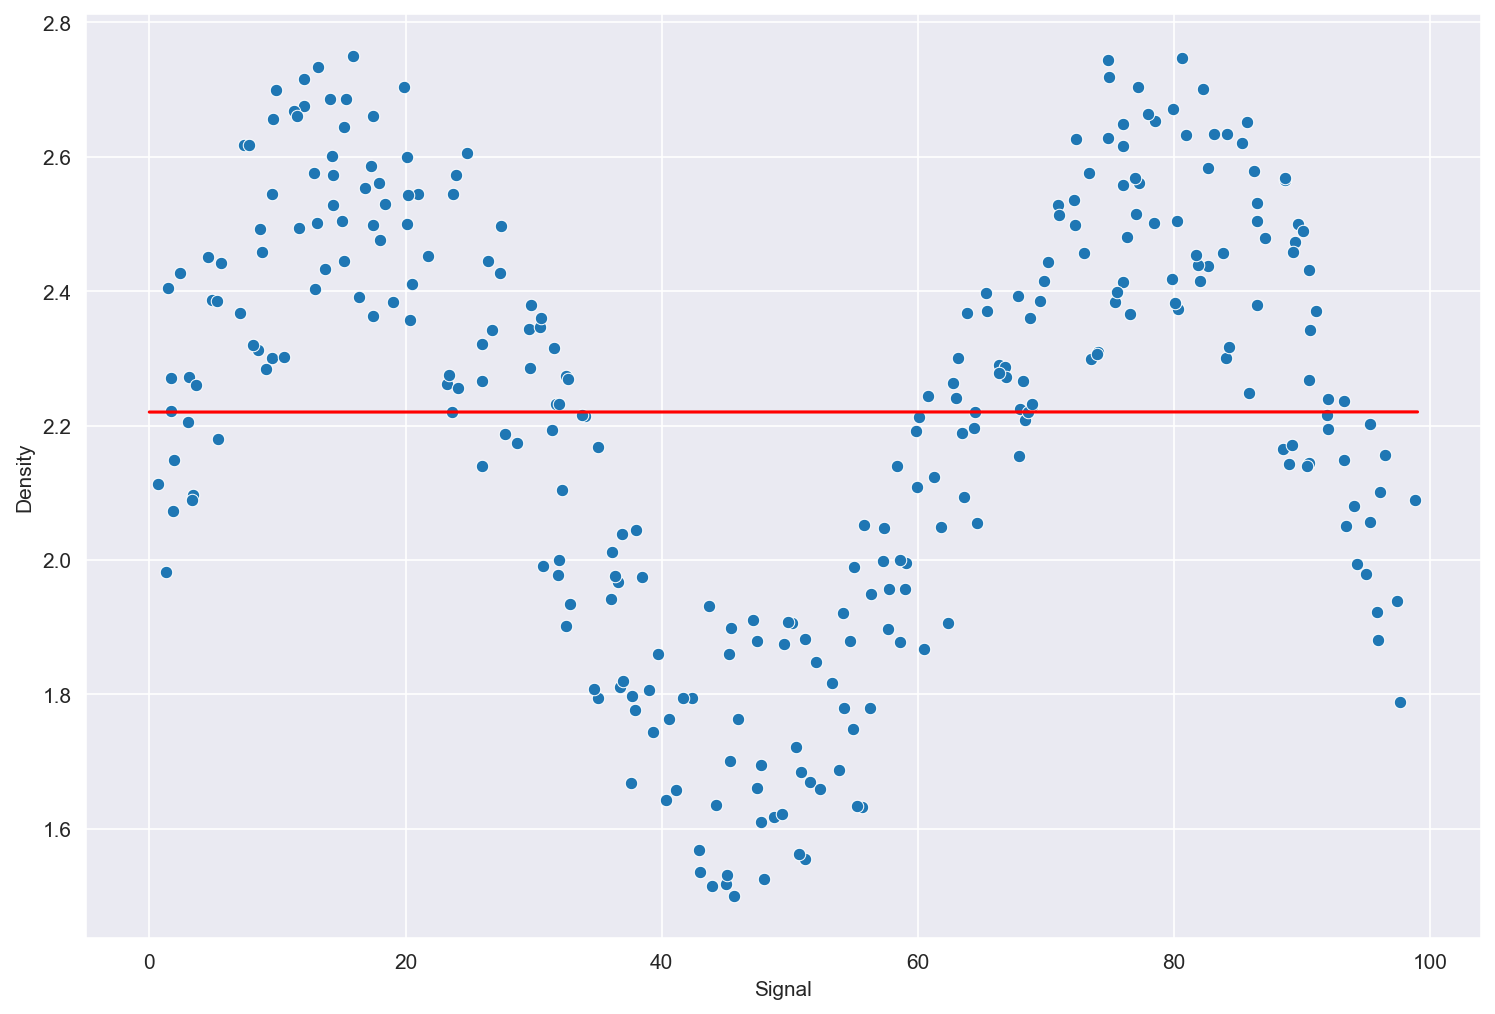

In [23]:
plt.figure(figsize=(12, 8), dpi=150)
sns.scatterplot(x='Signal', y='Density', data=df)
plt.plot(single_range, lr_output, color='red')

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
def run_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"RMSE: {rmse}")
    
    signal_range = np.arange(0, 100)
    output = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12, 8), dpi=150)
    sns.scatterplot(x='Signal', y='Density', data=df)
    plt.plot(signal_range, output, color='red')
    

RMSE: 0.2570051996584629


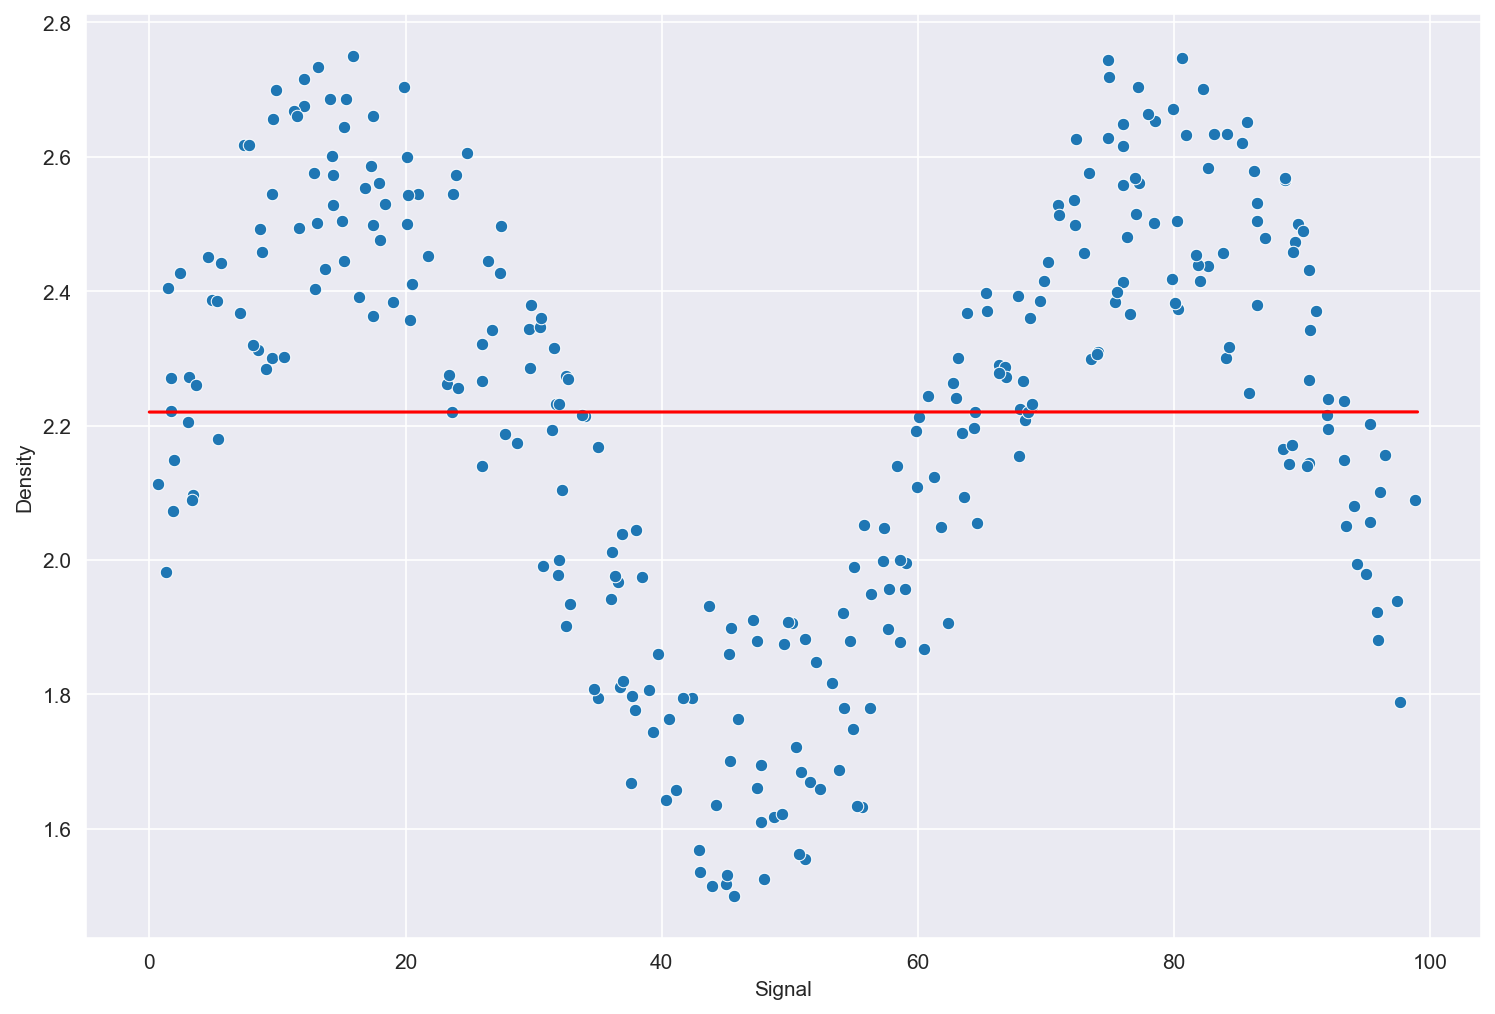

In [27]:
run_model(model, X_train, X_test, y_train, y_test)

In [28]:
from sklearn.pipeline import make_pipeline

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

RMSE: 0.2817309563725596


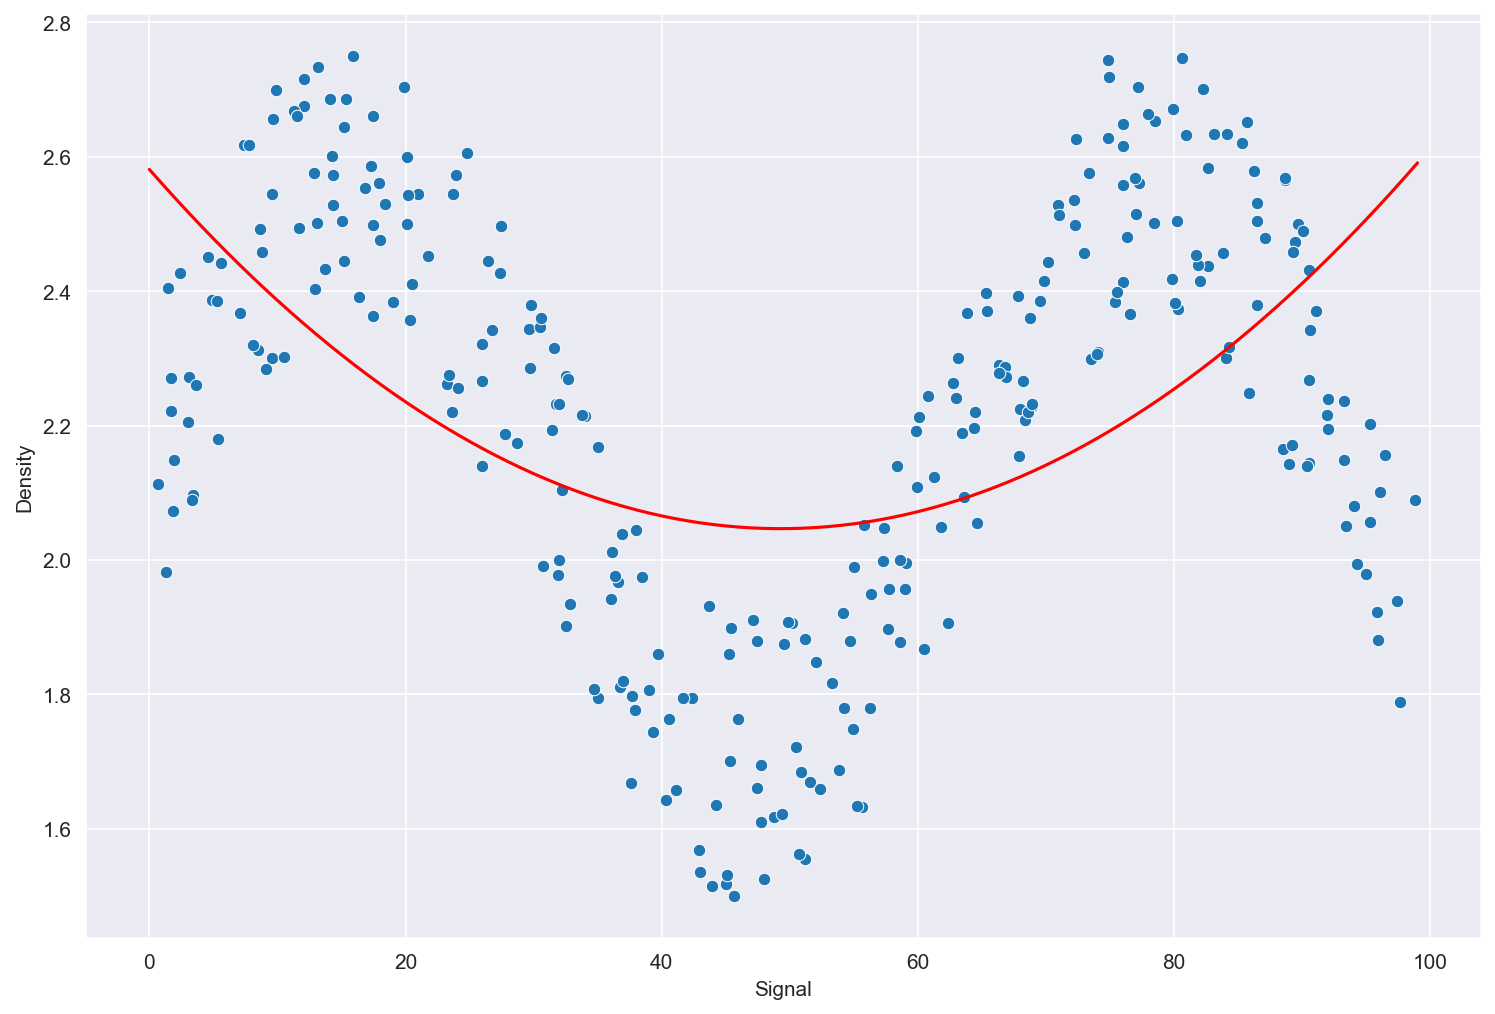

In [31]:
run_model(pipe, X_train, X_test, y_train, y_test)

RMSE: 0.14011815618437704


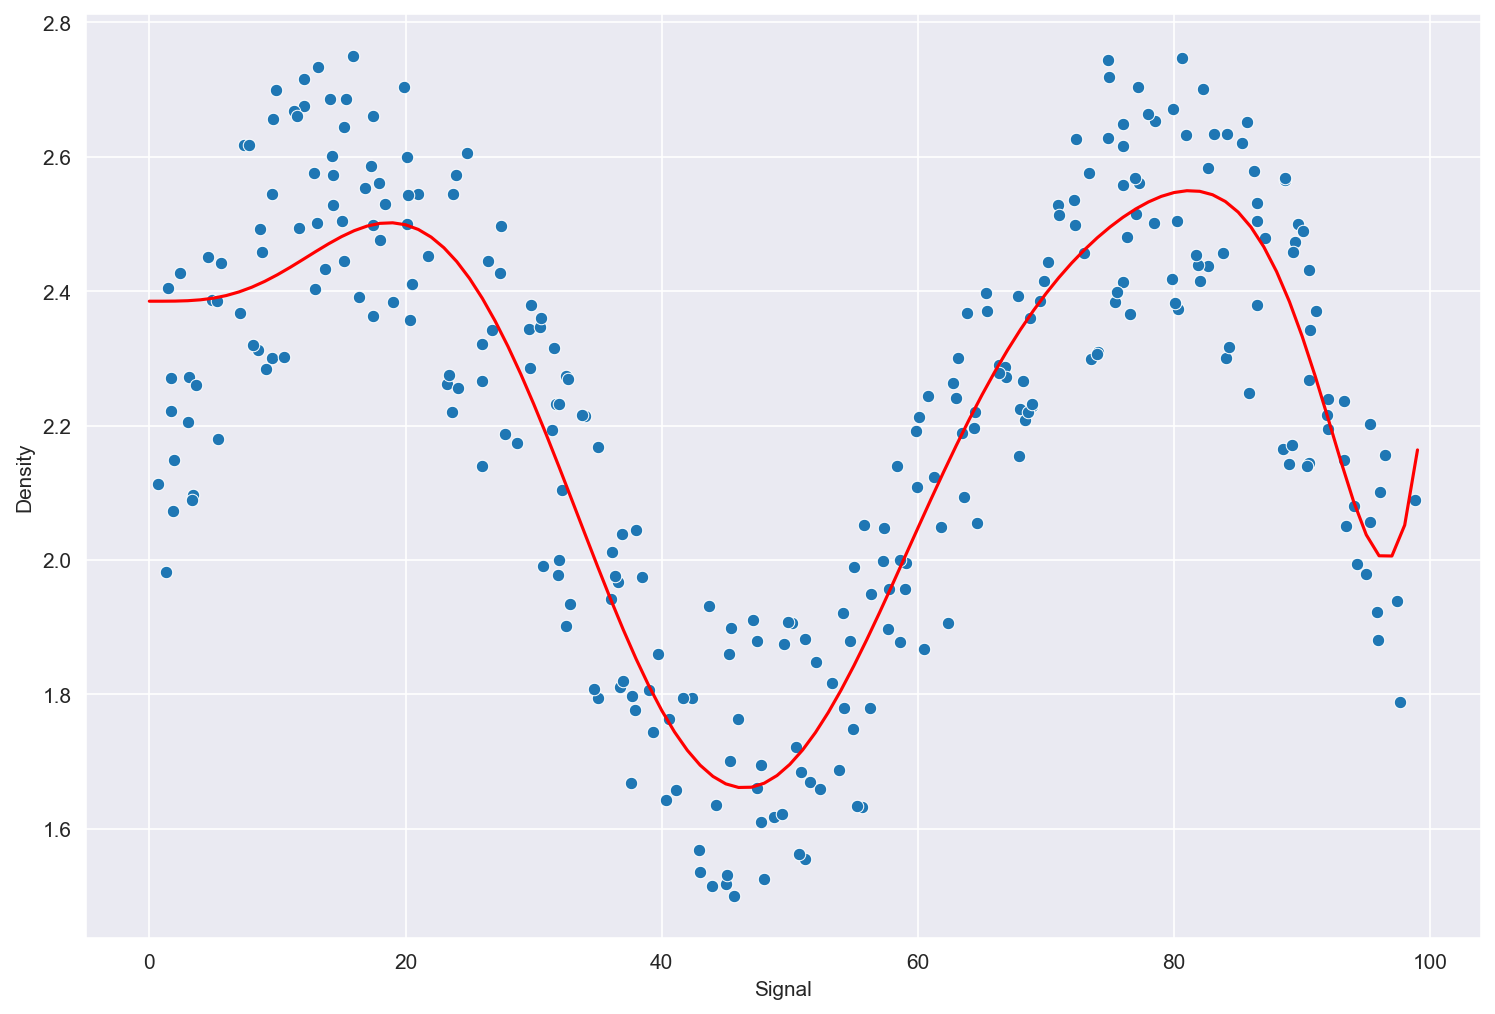

In [32]:
pipe = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())
run_model(pipe, X_train, X_test, y_train, y_test)

In [33]:
from sklearn.neighbors import KNeighborsRegressor

RMSE: 0.1523487028635337
RMSE: 0.13730685016923647
RMSE: 0.13277855732740926


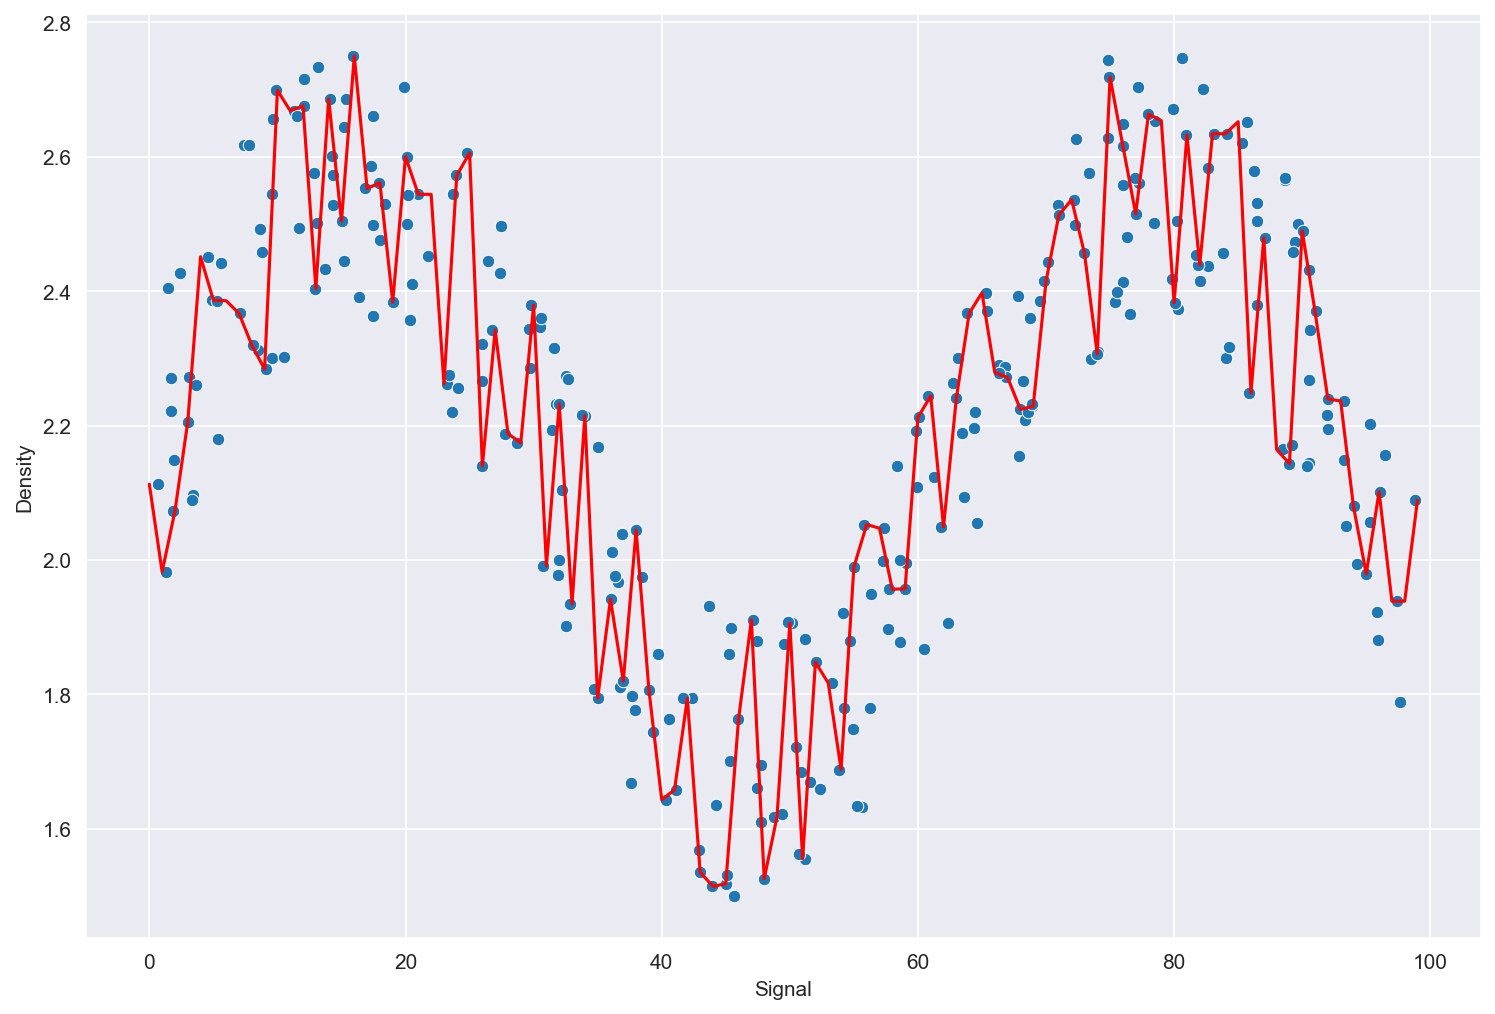

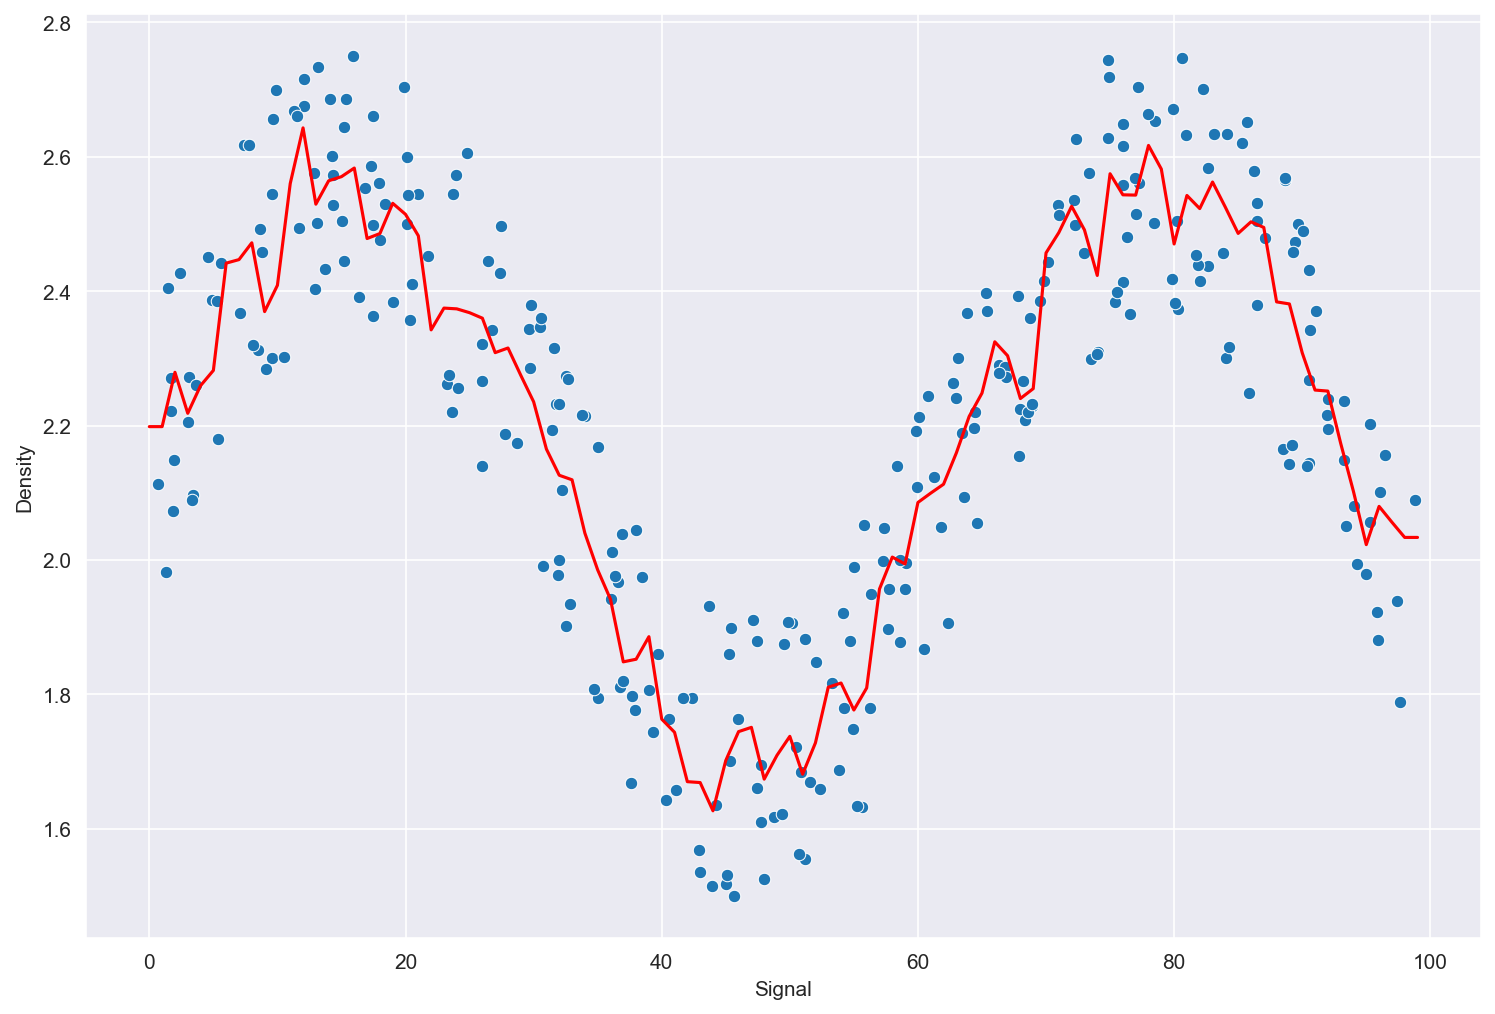

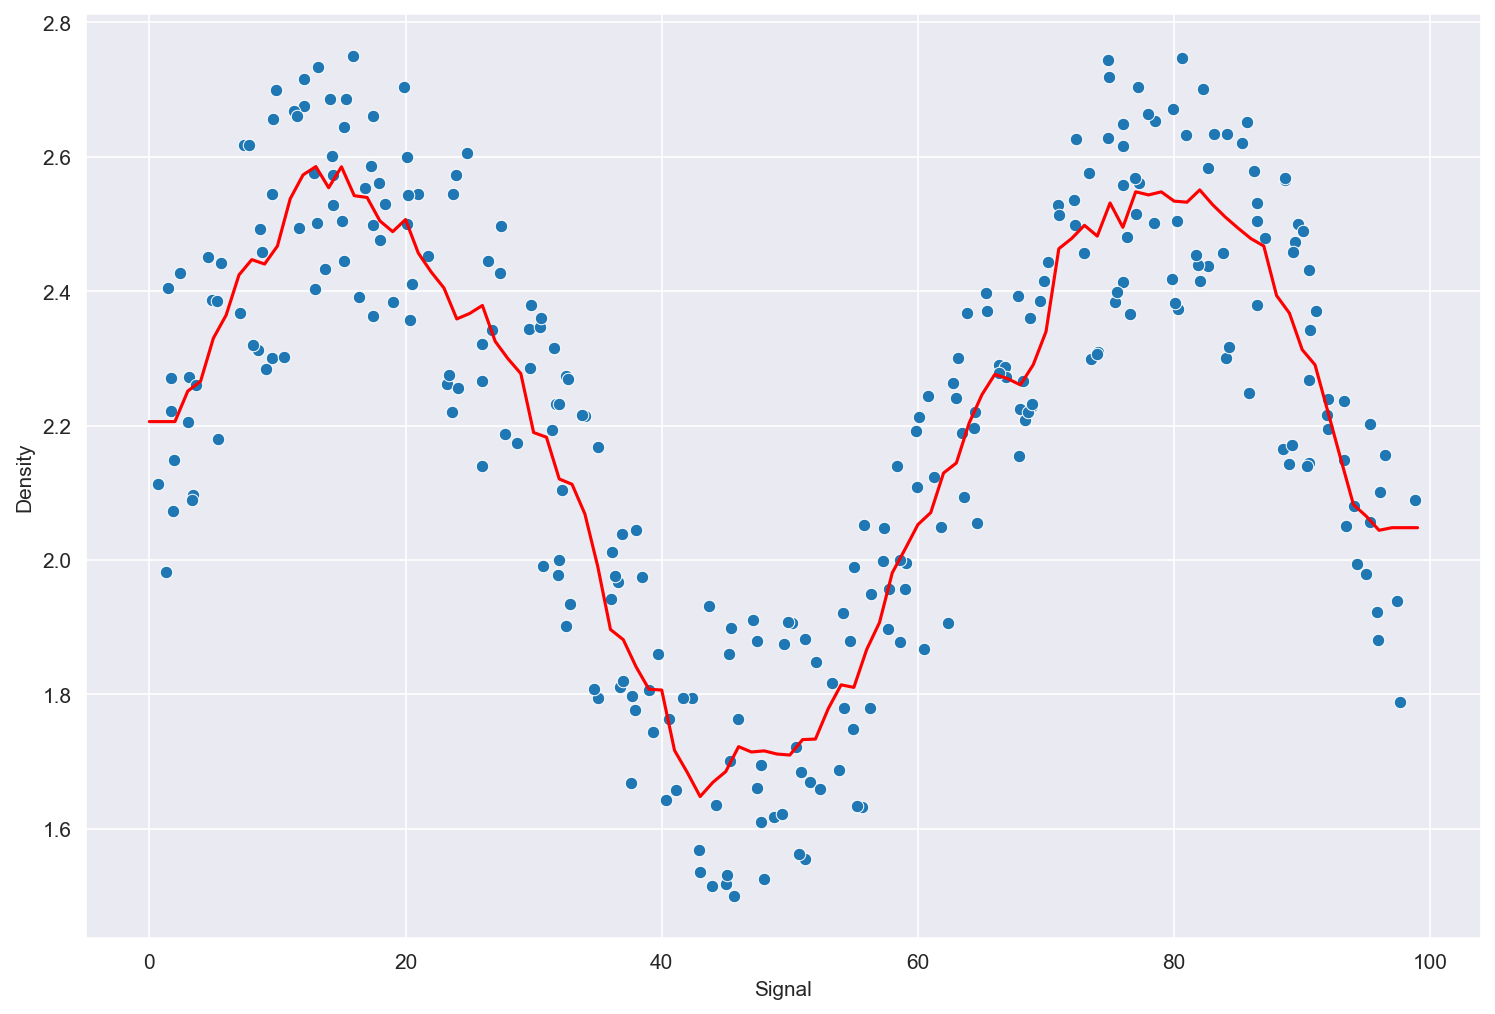

In [34]:
preds = {}
k_values = [1, 5, 10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, X_test, y_train, y_test)

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
model = DecisionTreeRegressor()

RMSE: 0.1523487028635337


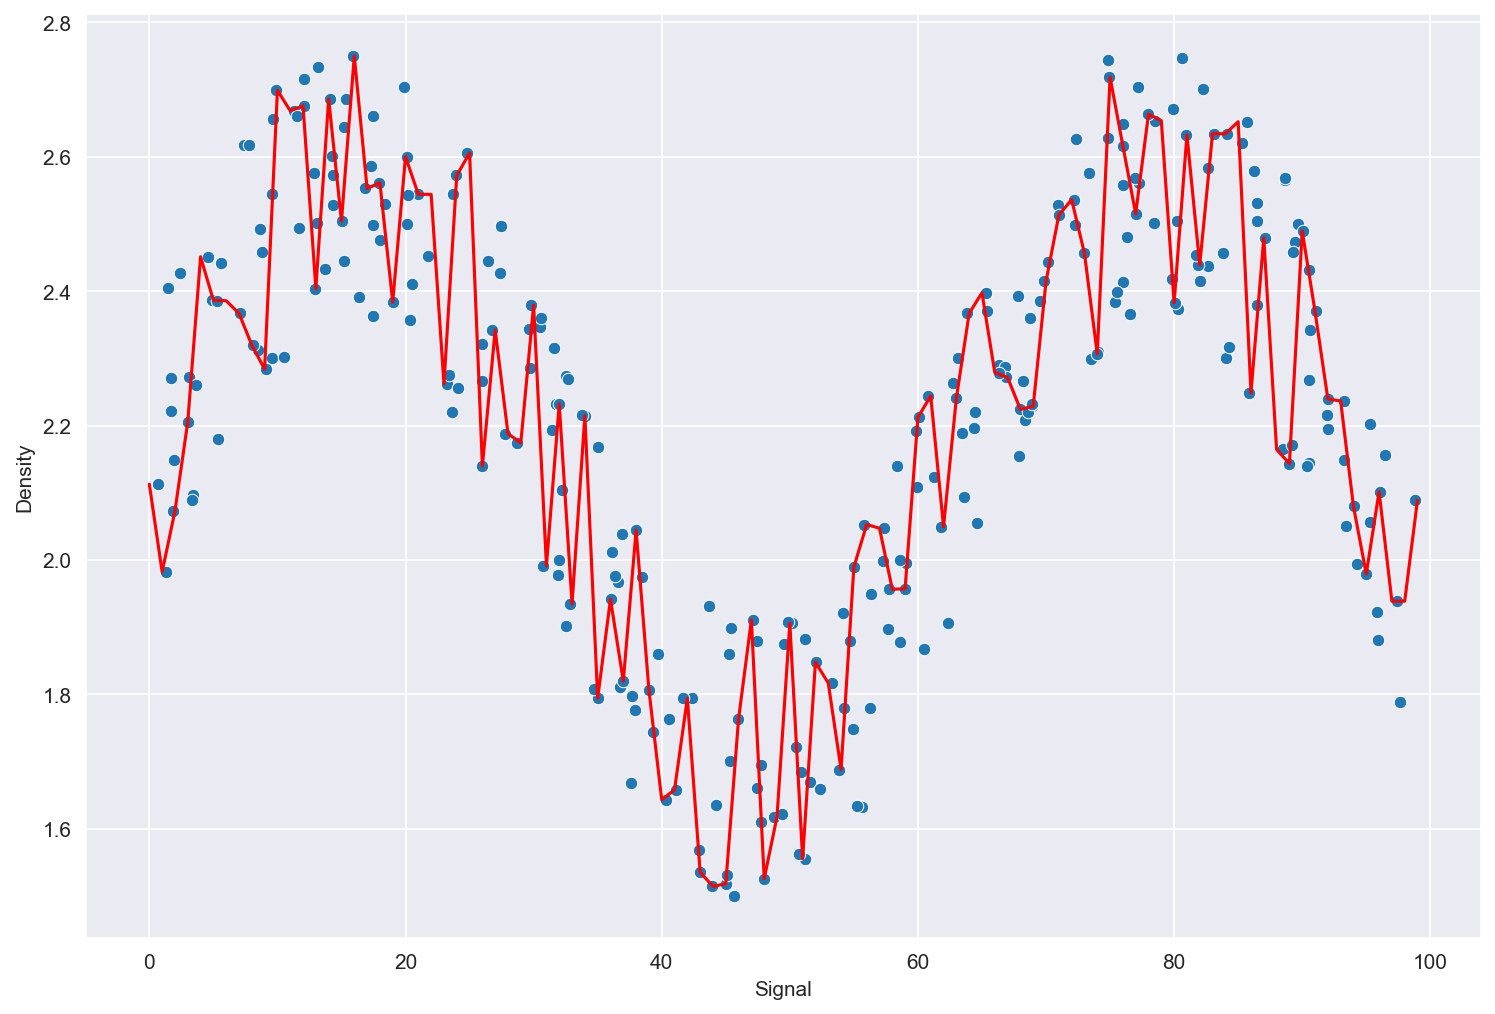

In [37]:
run_model(model, X_train, X_test, y_train, y_test)

In [38]:
model.get_n_leaves()

270

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': ['scale', 'auto']}

In [41]:
from sklearn.svm import SVR

In [42]:
svr = SVR()

In [43]:
grid = GridSearchCV(svr, param_grid)

RMSE: 0.12646999302046696


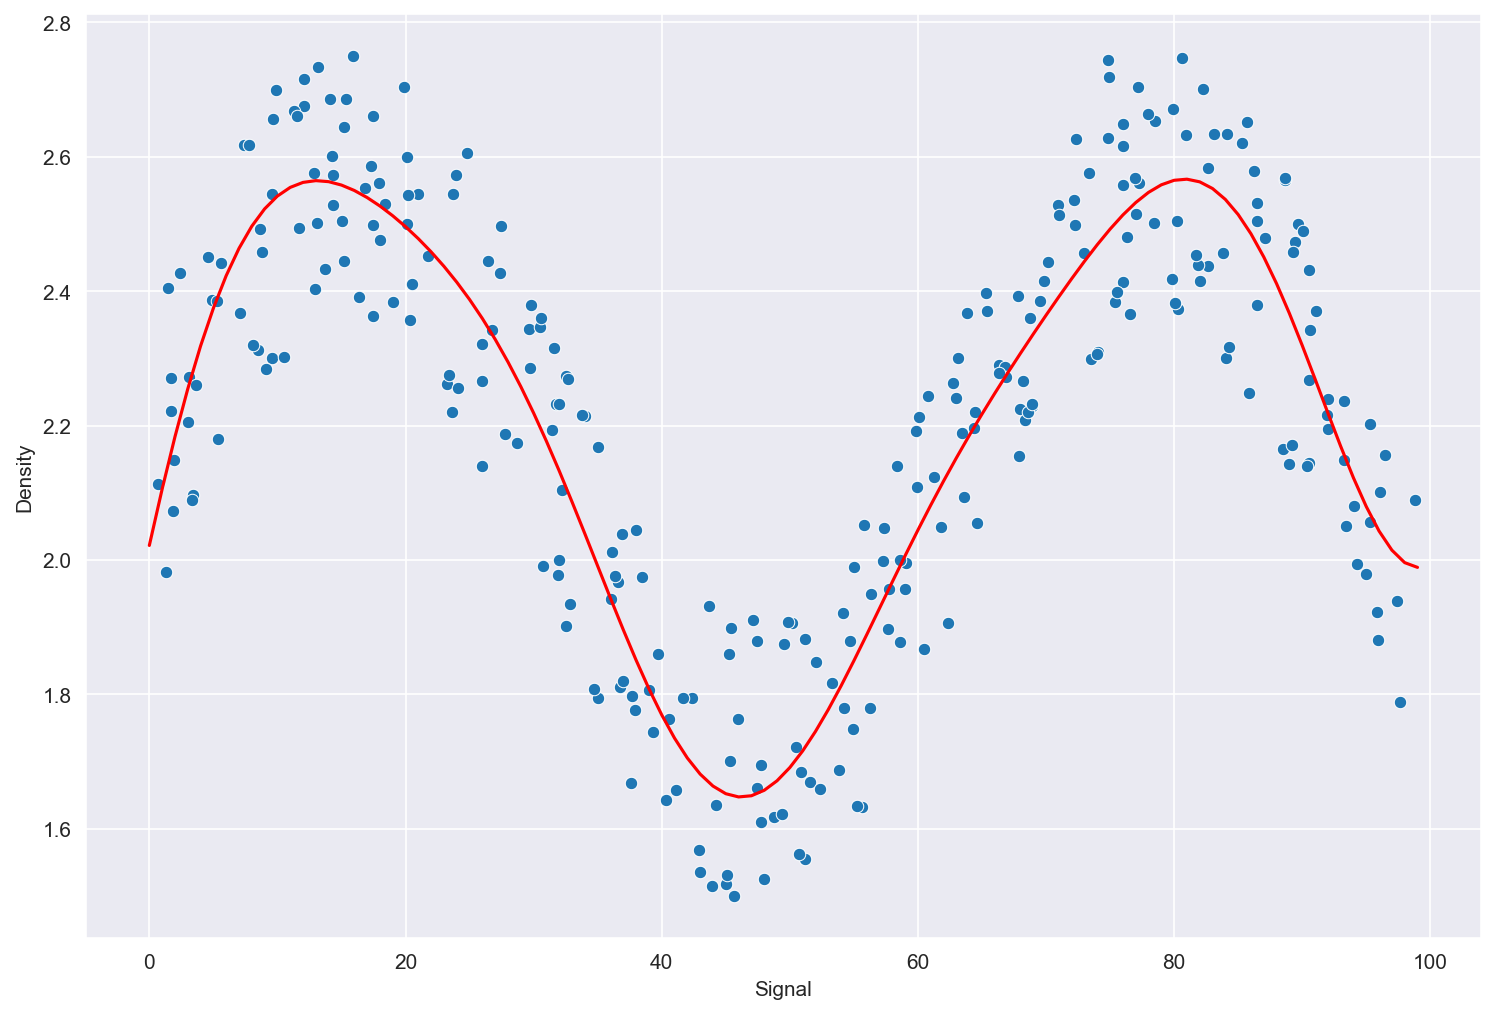

In [44]:
run_model(grid, X_train, X_test, y_train, y_test)

In [45]:
grid.best_params_

{'C': 1000, 'gamma': 'scale'}

In [46]:
trees = [10, 50, 100]

In [47]:
from sklearn.ensemble import RandomForestRegressor

RMSE: 0.13513186051654116
RMSE: 0.1359876688341694
RMSE: 0.1339428950463672


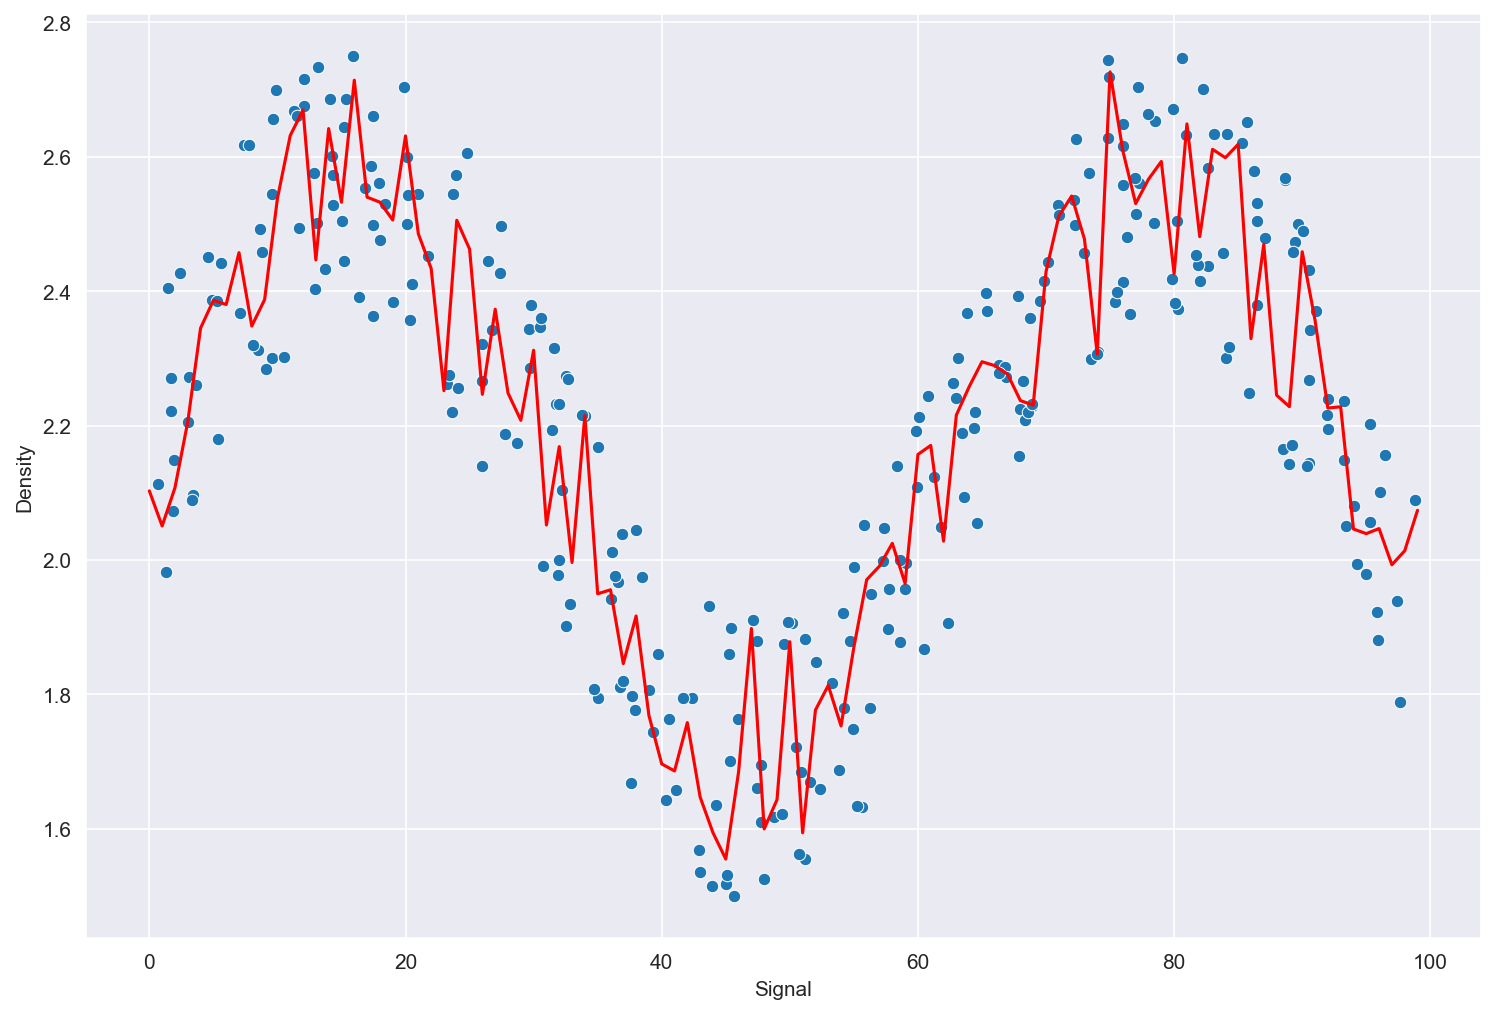

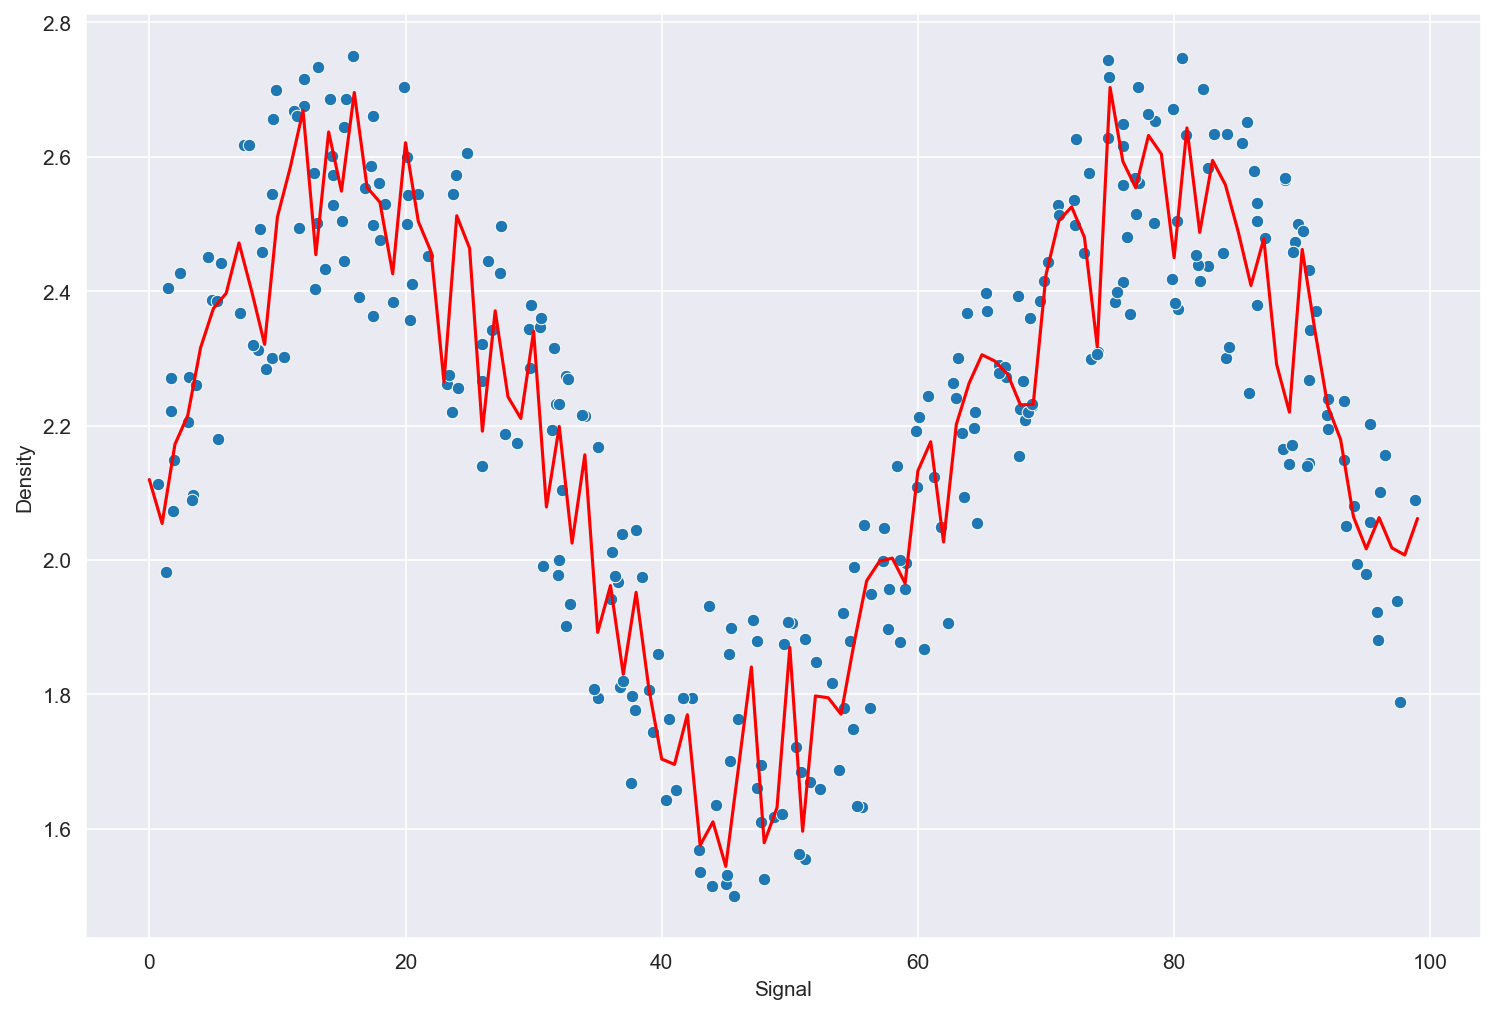

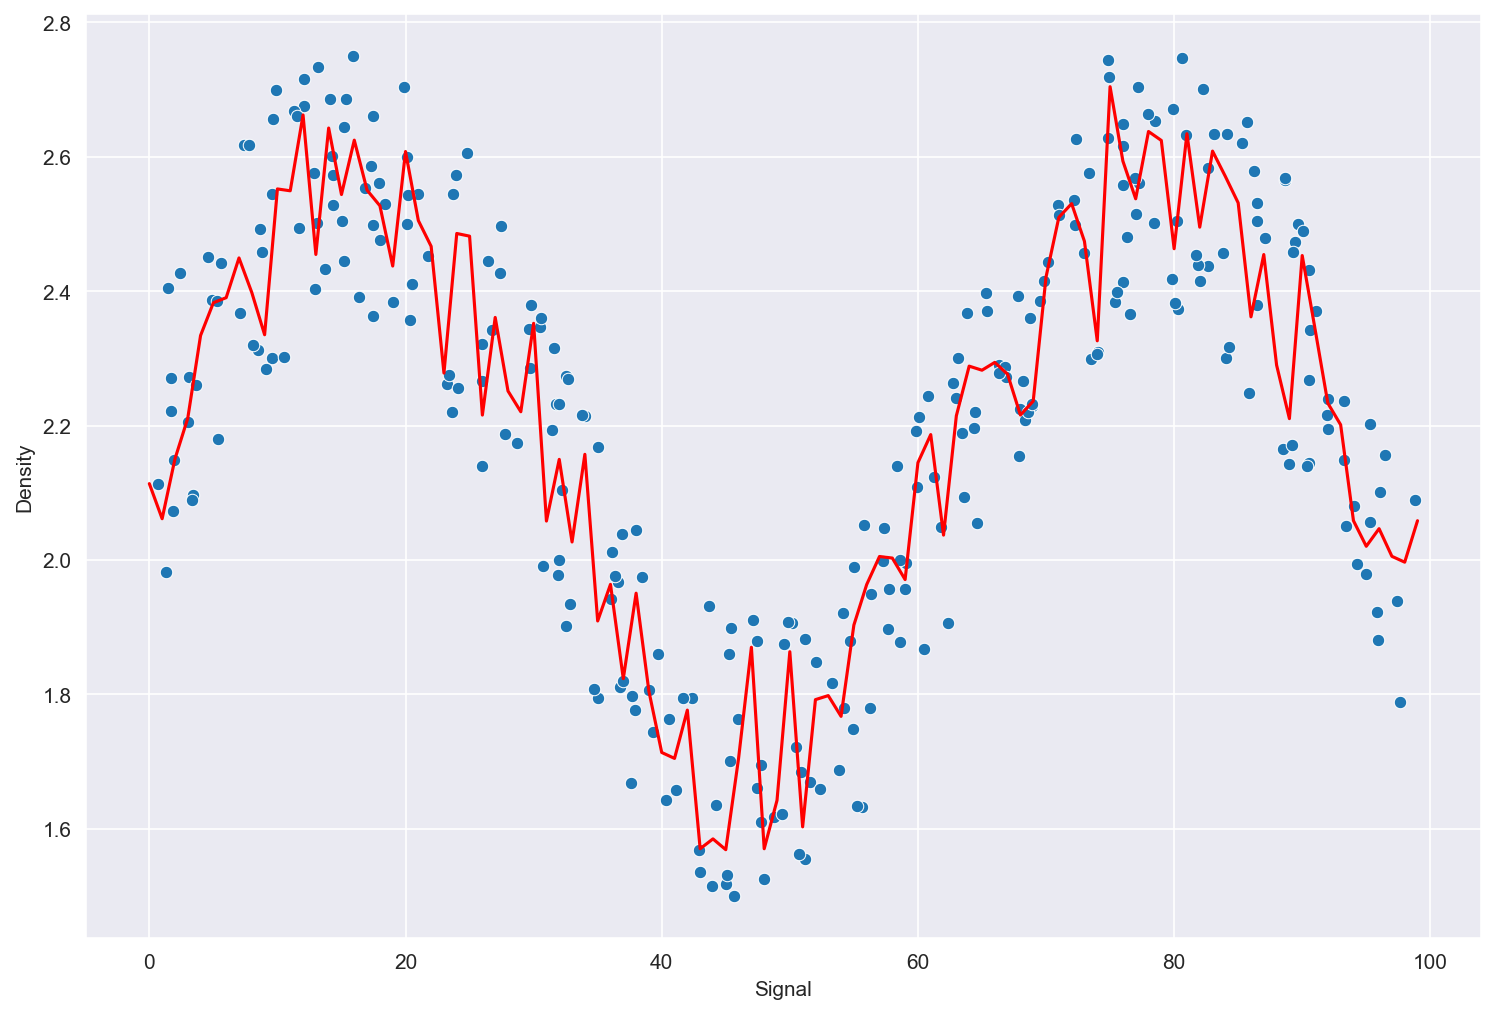

In [48]:
for n in trees:
    model = RandomForestRegressor(n_estimators=n)
    run_model(model, X_train, X_test, y_train, y_test)

In [49]:
model.feature_importances_

array([1.])

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
model = GradientBoostingRegressor()

RMSE: 0.13294148649584667


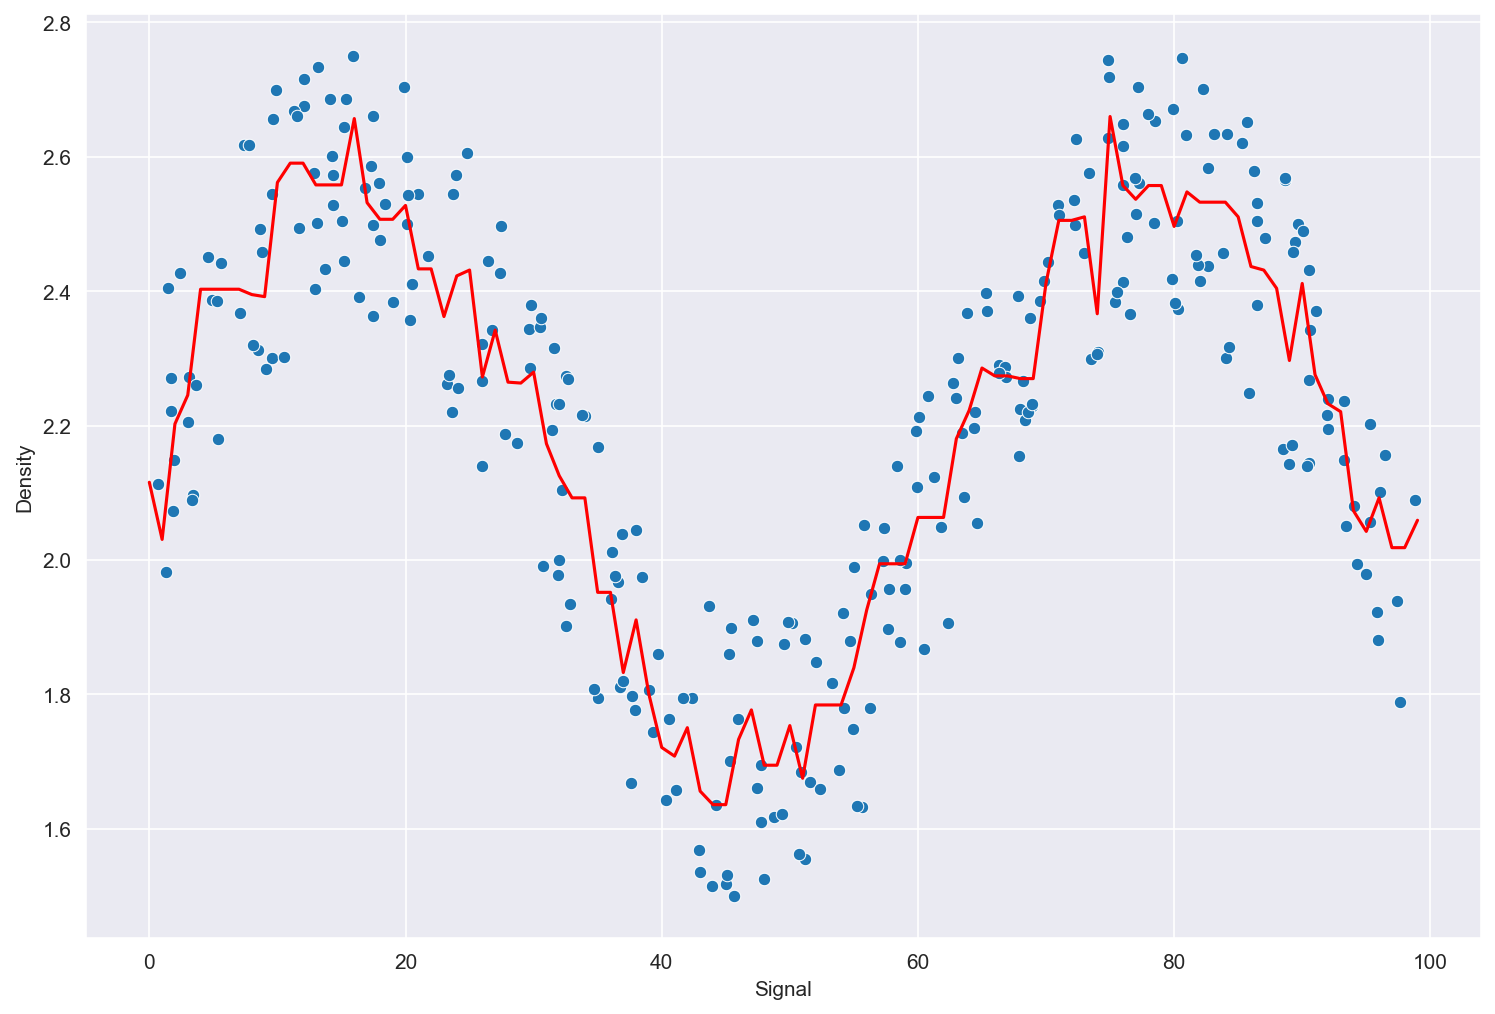

In [52]:
run_model(model, X_train, X_test, y_train, y_test)

In [53]:
from sklearn.ensemble import AdaBoostRegressor

In [54]:
model = AdaBoostRegressor()

RMSE: 0.13895489643509196


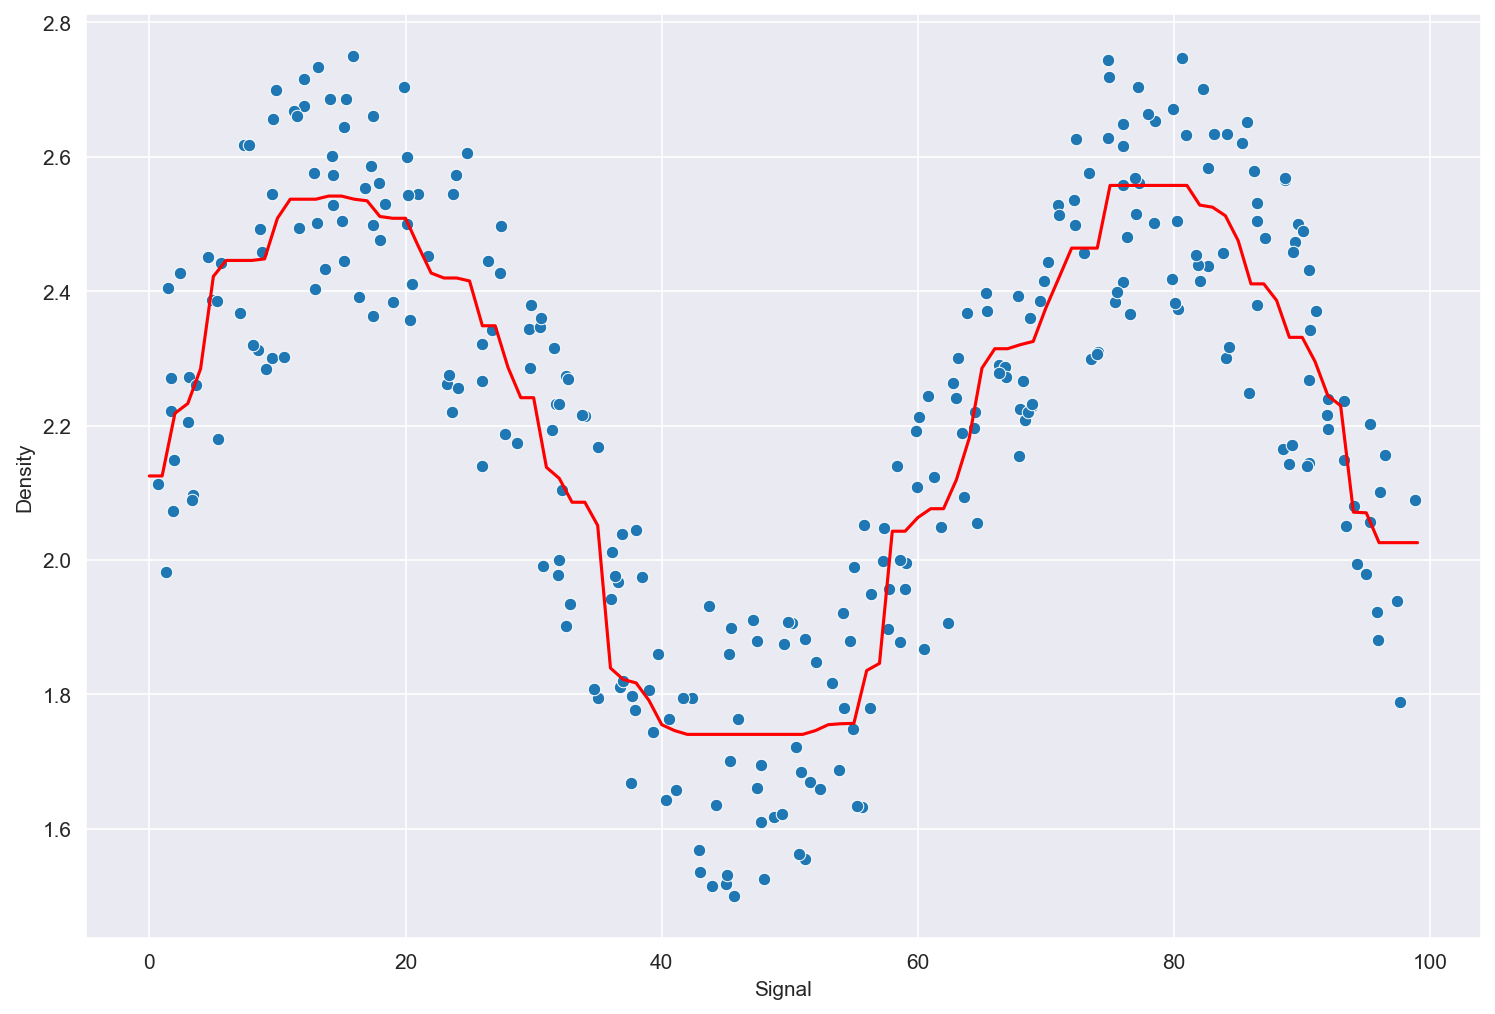

In [55]:
run_model(model, X_train, X_test, y_train, y_test)